# 1.4.1 Jupyter Notebook
ブラウザ上でコードを実行するためのインタラクティブな環境

コードやテキストや画像を取り組むことが簡単にできる。

# 1.4.2 NumPy
Pythonで科学技術計算をする際の基本的なツールの1つ

多次元配列機能や線形代数やフーリエ変換, 疑似乱数生成器などの高レベルの数学関数が用意されている。

scikit-learnでは、Numpyの配列が基本的なデータ構造となり, NumPy配列で入力を受け取る。

⇒使用するデータは,NumPy配列(ndarrayクラス)に変換する必要がある。

[SciPy Lecture Notes](http://www.turbare.net/transl/scipy-lecture-notes/intro/index.html)の最初の章に詳しい記載がある。

In [2]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print('x:\n{}'.format(x))

x:
[[1 2 3]
 [4 5 6]]


# 1.4.3 SciPy
Pythonで科学技術計算を行うための関数を集めたものである。

高度な線形代数ルーチンや, 数学関数の最適化, 信号処理, 特殊な数学関数, 統計分布などの機能を持つ。

scikit-learnは, アルゴリズムを実装する際にSciPyの関数群を利用している。

**疎行列**：成分のほとんどがゼロとなっている2次元配列　( scipy.sparse )

>COO(COOdinate)形式、LIL(LInked List)形式、CSR(Compressed Sparse Rows)形式、CSC(Compressed Sparse Columns)形式
>
>- CSR, CSC形式は、同じ型同士の掛け算・足し算が高速。LIL、COO形式は演算には向いていない。
>- CSRは行を取り出すのが高速、CSCは列を取り出すのが高速
>- LIL形式は[i,j]成分に値をセットするのは高速。CSR、CSC形式は、[i,j]成分に値をセットするのは遅い（warningが出る）。COOは[i,j]成分に値をセットする機能そのものがない。
>
>以上のようなことがあるので、使い勝手を考えると、LIL形式疎行列を作って値をセットする→CSRまたはCSCに変換して計算をする、という流れが一般的
（ただし、以下に書くようにこれには罠がある）

[scipy.sparseでの疎ベクトルの扱い](http://hamukazu.com/2014/01/30/sparse-vector-with-scipy-sparse/)

In [3]:
from scipy import sparse

# 体格成分が1でそれ以外が0の, 2次元NumPy配列を作る
eye = np.eye(4)
print('NumPy array:\n{}'.format(eye))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# NumPy配列をSciPyのCSR形式の疎行列に変換する
# 非ゼロ要素だけが格納される。
sparse_matrix = sparse.csr_matrix(eye)
print('SciPy sparse CSR matrix:\n{}'.format(sparse_matrix))

SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print('COO representation:\n{}'.format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


# 1.4. matplotlib
最も広く使われているPythonの科学技術計算向けのグラフ描画ライブラリ

Jupyter Notebokk の内部では、%matplotlib notebook や %matplotlib inline コマンドを用いることで図をブラウザ上に直接表示できる。

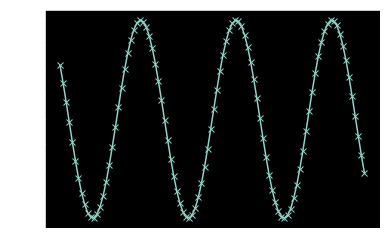

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# -10から10までを100ステップに区切った列を配列として生成
X = np.linspace(-10, 10, 100)
# サイン関数を用いて2つ目の配列を生成
y = np.sin(X)
# plot関数は、一方の配列に対して他方の配列をプロットする。
plt.plot(X, y, marker="x")

# 1.4.5 pandas
データを変換したり、解析したりするためのライブラリ

RのDataFrameを模して作られており、DataFrameというデータ構造を中心に構成されている。

pandasのDataFrameは、テーブル(表)のようなもので、テーブルに対してSQLのような問い合わせやジョインを行える。

様々なファイルフォーマットやデータベースからデータを取り込める機能も有用である。

In [14]:
import pandas as pd
# 人を表す簡単なデータセットを作る。
data = {'Name':['John', 'Anna', 'Peter', 'Linda'],
        'Location':['New York', 'Paris', 'Berlin', 'London'],
        'Age':[24,13,53,33]}
data_pandas = pd.DataFrame(data)
# IPython.displayを用いるとDataFrameをキレイに表示することができる。
from IPython.display import display
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [15]:
# ageカラムが30を超えるすべての行を取り出す
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


# 1.4.6 mglearn
グラフ描画やデータのロードなどの詳細なコードリストで本書が読みにくくならないように用意した関数

```:bash
pip install mglearn
```